<a href="https://colab.research.google.com/github/ilmaan/Feature-Engineering---Exploritory-Data-Analysis-On-Titaic-DataSet/blob/main/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

df['Cabin_null'].mean()

0.7710437710437711

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [8]:
df.groupby(['Survived'])['Cabin_null'].mean()


Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

In [9]:
### MEAN MEDIAN MODE IMPUTATION

In [10]:
df1 = pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])

In [11]:
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
#Percenage of missing values
df1.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [56]:
def imp_nan(df,feature,m):
  df1[feature+'M'] = df1[feature].fillna(m)


In [57]:
median = df1.Age.median()

In [58]:
imp_nan(df1,'Age',median)

In [59]:
df1[df1['Age'].isnull()]

,Survived,Age,Fare,AgeM
5,0,NaN,8.4583,28.0
17,1,NaN,13.0000,28.0
19,1,NaN,7.2250,28.0
26,0,NaN,7.2250,28.0
28,1,NaN,7.8792,28.0
...,...,...,...,...
859,0,NaN,7.2292,28.0
863,0,NaN,69.5500,28.0
868,0,NaN,9.5000,28.0
878,0,NaN,7.8958,28.0


In [60]:
df1.head()

,Survived,Age,Fare,AgeM
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [61]:
print(df1['Age'].std())
print(df1['AgeM'].std())

14.526497332334044
13.019696550973194


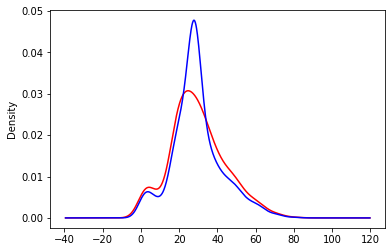

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['Age'].plot(kind='kde',ax=ax,color='red')
df1['AgeM'].plot(kind='kde',ax=ax,color='blue')


In [63]:
### Random Sample Imputation

In [71]:
df2 = df[['Age','Fare','Survived']]

In [72]:
df2

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [73]:
df2.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [74]:
df2.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [85]:
df2['Age'].isnull().sum()

177

In [87]:
# df['Age'].dropna().sample()
df2['Age'].dropna().sample(df2['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [108]:
def imp_nan1(df,feature,m):
  df2[feature+'M'] = df2[feature].fillna(m)
  df2[feature+'R'] = df2[feature]
  random_sample = df2[feature].dropna().sample(df2[feature].isnull().sum(),random_state=0)

  random_sample.index = df2[df2[feature].isnull()].index
  df2.loc[df2[feature].isnull(),feature+'R']=random_sample


In [109]:
imp_nan1(df2,'Age',median)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [113]:
df2

,Age,Fare,Survived,AgeM,AgeR
0,22.0,7.2500,0,22.0,22.0
1,38.0,71.2833,1,38.0,38.0
2,26.0,7.9250,1,26.0,26.0
3,35.0,53.1000,1,35.0,35.0
4,35.0,8.0500,0,35.0,35.0
...,...,...,...,...,...
886,27.0,13.0000,0,27.0,27.0
887,19.0,30.0000,1,19.0,19.0
888,NaN,23.4500,0,28.0,15.0
889,26.0,30.0000,1,26.0,26.0


In [114]:
df2[df2['Age'].isnull()]

,Age,Fare,Survived,AgeM,AgeR
5,NaN,8.4583,0,28.0,28.00
17,NaN,13.0000,1,28.0,50.00
19,NaN,7.2250,1,28.0,0.92
26,NaN,7.2250,0,28.0,36.00
28,NaN,7.8792,1,28.0,26.00
...,...,...,...,...,...
859,NaN,7.2292,0,28.0,22.00
863,NaN,69.5500,0,28.0,25.00
868,NaN,9.5000,0,28.0,15.00
878,NaN,7.8958,0,28.0,34.00


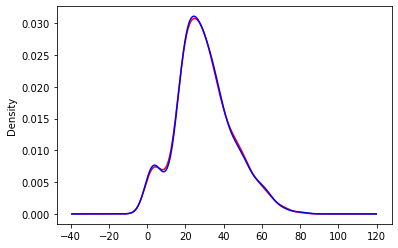

In [124]:
df2['Age'].plot(kind='kde',color='red')
df2['AgeR'].plot(kind='kde',color='blue')

In [125]:
### Capturing Nan Values with New Feature

In [145]:
df3 = df2.copy()

In [154]:
df3['AgeNull'] = np.where(df['Age'].isnull(),1,0)

In [155]:
df3

,Age,Fare,Survived,AgeM,AgeR,AgeNull
0,22.0,7.2500,0,22.0,22.0,0
1,38.0,71.2833,1,38.0,38.0,0
2,26.0,7.9250,1,26.0,26.0,0
3,35.0,53.1000,1,35.0,35.0,0
4,35.0,8.0500,0,35.0,35.0,0
...,...,...,...,...,...,...
886,27.0,13.0000,0,27.0,27.0,0
887,19.0,30.0000,1,19.0,19.0,0
888,NaN,23.4500,0,28.0,15.0,1
889,26.0,30.0000,1,26.0,26.0,0


In [157]:
df3[df3['AgeNull']==1] 

,Age,Fare,Survived,AgeM,AgeR,AgeNull
5,NaN,8.4583,0,28.0,28.00,1
17,NaN,13.0000,1,28.0,50.00,1
19,NaN,7.2250,1,28.0,0.92,1
26,NaN,7.2250,0,28.0,36.00,1
28,NaN,7.8792,1,28.0,26.00,1
...,...,...,...,...,...,...
859,NaN,7.2292,0,28.0,22.00,1
863,NaN,69.5500,0,28.0,25.00,1
868,NaN,9.5000,0,28.0,15.00,1
878,NaN,7.8958,0,28.0,34.00,1


In [159]:
df3['Age'].fillna(df.Age.median(),inplace=True)

In [160]:
df3.head(10)

,Age,Fare,Survived,AgeM,AgeR,AgeNull
0,22.0,7.2500,0,22.0,22.0,0
1,38.0,71.2833,1,38.0,38.0,0
2,26.0,7.9250,1,26.0,26.0,0
3,35.0,53.1000,1,35.0,35.0,0
4,35.0,8.0500,0,35.0,35.0,0
5,28.0,8.4583,0,28.0,28.0,1
6,54.0,51.8625,0,54.0,54.0,0
7,2.0,21.0750,0,2.0,2.0,0
8,27.0,11.1333,1,27.0,27.0,0
9,14.0,30.0708,1,14.0,14.0,0


In [161]:
### End Of Distribution Imputation

In [163]:
df4 = df2.copy()
df4

,Age,Fare,Survived,AgeM,AgeR
0,22.0,7.2500,0,22.0,22.0
1,38.0,71.2833,1,38.0,38.0
2,26.0,7.9250,1,26.0,26.0
3,35.0,53.1000,1,35.0,35.0
4,35.0,8.0500,0,35.0,35.0
...,...,...,...,...,...
886,27.0,13.0000,0,27.0,27.0
887,19.0,30.0000,1,19.0,19.0
888,NaN,23.4500,0,28.0,15.0
889,26.0,30.0000,1,26.0,26.0


In [176]:
extr = df4.Age.mean() + 3*df4.Age.std()
extr

73.27860964406095

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


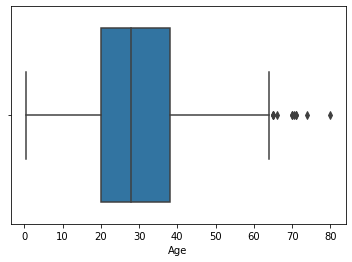

In [175]:
sns.boxplot('Age',data=df4)

In [177]:
def imp_nan2(df,feature,m,extr):
  df[feature+'endis'] = df[feature].fillna(extr)
  df[feature].fillna(m,inplace=True)

In [180]:
imp_nan2(df4,'Age',df.Age.median(),extr)

In [183]:
df4.head(10)

,Age,Fare,Survived,AgeM,AgeR,Ageendis
0,22.0,7.2500,0,22.0,22.0,22.00000
1,38.0,71.2833,1,38.0,38.0,38.00000
2,26.0,7.9250,1,26.0,26.0,26.00000
3,35.0,53.1000,1,35.0,35.0,35.00000
4,35.0,8.0500,0,35.0,35.0,35.00000
5,28.0,8.4583,0,28.0,28.0,73.27861
6,54.0,51.8625,0,54.0,54.0,54.00000
7,2.0,21.0750,0,2.0,2.0,2.00000
8,27.0,11.1333,1,27.0,27.0,27.00000
9,14.0,30.0708,1,14.0,14.0,14.00000


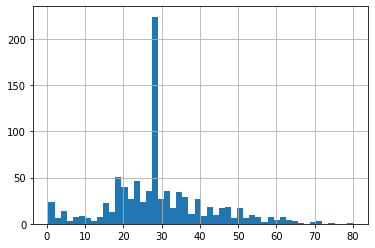

In [186]:
df4['Age'].hist(bins=50)

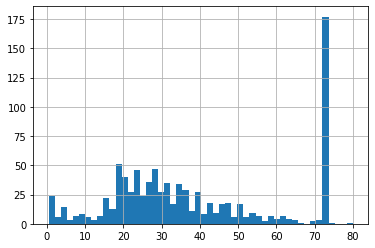

In [192]:
df4['Ageendis'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


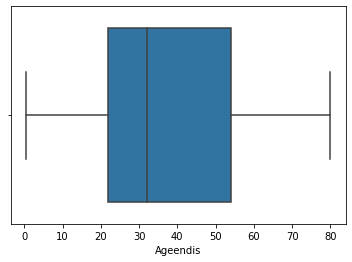

In [196]:
sns.boxplot('Ageendis',data=df4)